In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, r2_score, r2_score, confusion_matrix
from sklearn.utils import shuffle
import imutils
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint

In [2]:
# CNN Architecture
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2 ,2)))
model.add(layers.Conv2D(32, (3 ,3), activation='relu'))
model.add(layers.MaxPooling2D((2 ,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2 ,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
root_path = os.getcwd()
TRAINING_DIRECTORY = root_path + '/drive/MyDrive/FaceMaskDetection/train'
train_datagenerator = ImageDataGenerator(rescale=1./255)
train_gen = train_datagenerator.flow_from_directory(TRAINING_DIRECTORY, target_size=(150, 150), batch_size=128, class_mode='binary')

VALIDATION_DIRECTORY = root_path + '/drive/MyDrive/FaceMaskDetection/test'
valid_datagenerator = ImageDataGenerator(rescale=1./255)
valid_gen = valid_datagenerator.flow_from_directory(VALIDATION_DIRECTORY, batch_size=32, target_size=(150, 150), class_mode='binary')

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [5]:
#Using callbacks for training control
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_accuracy') > 0.95:
      print('Treshold loss reached, cancelling training....\n')
      self.model.stop_training = True

# train model
tf.random.set_seed(42)
# 
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(train_gen, epochs=10, validation_data=valid_gen, callbacks=[myCallback()])

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
history = model.fit(train_gen,
                    steps_per_epoch=10,
                    epochs=10, 
                    validation_data=valid_gen,
                    validation_steps=6,
                    callbacks=[myCallback()])

Epoch 1/10
10/10 [==============================] - 31s 3s/step - loss: 1.1797 - accuracy: 0.5720 - val_loss: 0.6225 - val_accuracy: 0.5052
Epoch 2/10
10/10 [==============================] - 29s 3s/step - loss: 0.5524 - accuracy: 0.6824 - val_loss: 0.5983 - val_accuracy: 0.5625
Epoch 3/10
10/10 [==============================] - 29s 3s/step - loss: 0.3539 - accuracy: 0.8484 - val_loss: 0.2052 - val_accuracy: 0.9167
Epoch 4/10
10/10 [==============================] - 29s 3s/step - loss: 0.3486 - accuracy: 0.8627 - val_loss: 0.2471 - val_accuracy: 0.8750
Epoch 5/10
10/10 [==============================] - 29s 3s/step - loss: 0.2096 - accuracy: 0.9292 - val_loss: 0.2403 - val_accuracy: 0.8854
Epoch 6/10
10/10 [==============================] - 29s 3s/step - loss: 0.1797 - accuracy: 0.9326 - val_loss: 0.1929 - val_accuracy: 0.9219
Epoch 7/10
10/10 [==============================] - 29s 3s/step - loss: 0.1589 - accuracy: 0.9402 - val_loss: 0.1763 - val_accuracy: 0.9167
Epoch 8/10
10/10 [==

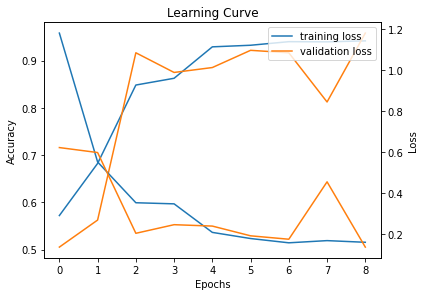

In [9]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label = 'training accuracy')
ax.plot(history.history['val_accuracy'], label = 'validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax2 = ax.twinx()
ax2.plot(history.history['loss'], label = 'training loss')
ax2.plot(history.history['val_loss'], label = 'validation loss')
ax2.set_ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.title('Learning Curve')
plt.show()

In [ ]:
y_predict = model.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1))
print(f"Accuracy is {round(accuracy, 2) * 100}%\n")
_precision_score_ = precision_score(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1), average='micro')
print(f"Precision is {round(_precision_score_, 2) * 100}%\n")
_recall_score_ = precision_score(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1), average='micro')
print(f"Recall is {round(_recall_score_, 2) * 100}%\n")
# confusion_matrix_df = pd.DataFrame(data = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1)), index=["negative_actual", "positive_actual"], columns=["negative_predicted", "positive_predicted"])
confusion_matrix_df = pd.DataFrame(data = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1)))
confusion_matrix_df

In [7]:
model.save('facemaskdetectormodel2.h5')